In [1]:
# Run some setup code for this notebook.
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.models import load_model
from sklearn.preprocessing import StandardScaler  
from collections import defaultdict
from keras import backend as K
from keras import optimizers

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load data

# stock componenet data
stock = defaultdict(defaultdict)
N_start_train = 209
N_end_train = 418
N_start_test = 418
N_end_test = 470
N_train = N_end_train-N_start_train
num_train_stock = 463 # set 463

stock_lp = pd.read_csv('data/SP500_stock_lp.csv', index_col=0).dropna(axis=1, how='any').astype('float32')
stock['calibrate']['lp'] = stock_lp.iloc[N_start_train:N_end_train, :num_train_stock]
stock['validate']['lp'] = stock_lp.iloc[N_start_test:N_end_test, :num_train_stock]

stock_net = pd.read_csv('data/SP500_stock_net1.csv', index_col=0).dropna(axis=1, how='any').astype('float32')
stock['calibrate']['net'] = stock_net.iloc[N_start_train:N_end_train, :num_train_stock]
stock['validate']['net'] = stock_net.iloc[N_start_test:N_end_test, :num_train_stock]

stock_percentage = pd.read_csv('data/SP500_stock_percentage.csv', index_col=0).dropna(axis=1, how='any').astype('float32')
stock['calibrate']['percentage'] = stock_percentage.iloc[N_start_train:N_end_train, :num_train_stock]*100
stock['validate']['percentage'] = stock_percentage.iloc[N_start_test:N_end_test, :num_train_stock]*100



# ibb data
ibb = defaultdict(defaultdict)
ibb_full = pd.read_csv('data/SP500_index.csv', index_col=0).astype('float32')

ibb_lp = ibb_full.iloc[:,0] # Series
ibb['calibrate']['lp'] = ibb_lp[N_start_train:N_end_train]
ibb['validate']['lp'] = ibb_lp[N_start_test:N_end_test]

ibb_net = ibb_full.iloc[:,1] # Series
ibb['calibrate']['net'] = ibb_net[N_start_train:N_end_train]
ibb['validate']['net'] = ibb_net[N_start_test:N_end_test]

ibb_percentage = ibb_full.iloc[:,2] # Series
ibb['calibrate']['percentage'] = ibb_percentage[N_start_train:N_end_train]*100
ibb['validate']['percentage'] = ibb_percentage[N_start_test:N_end_test]*100

In [5]:
#Y = ibb['calibrate']['percentage'].iloc[:].values 
#print(Y)
#print(Y+5)

In [44]:
#print(stock['calibrate']['percentage'])
#print(ibb_full.iloc[:,2][N_start_train:N_end_train])
#print(ibb['calibrate']['lp'].shape)
#print(ibb['calibrate']['lp'][:101])
#print(ibb['calibrate']['lp'])
#print(stock['calibrate']['lp'])
#print(ibb['calibrate']['percentage'])
#print(ibb['validate']['percentage'])
#print(ibb['validate']['percentage']+5)

In [3]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))



    
encoding_dim = 5 # 5 neurons
num_stock = 463 # Use 83 stocks as features

# connect all layers
input_img = Input(shape=(num_stock, ))

encoded = Dense(8, input_shape=(num_stock,), activation='relu')(input_img)
encoded = Dense(4, activation='relu')(encoded)
# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(num_stock, activation='linear')(decoded)



#encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_img)

#decoded = Dense(num_stock, activation= 'linear', kernel_regularizer=regularizers.l2(0.01))(encoded) # see 'Stacked Auto-Encoders' in paper

# construct and compile AE model
#sgd_t = optimizers.SGD(lr=0.01, clipnorm=1)
#sgd_t = optimizers.SGD(lr=0.01)
#adm_t = optimizers.Adam(learning_rate=0.01)

autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer=adm_t, loss='mean_squared_error')
autoencoder.compile(optimizer='sgd', loss='mean_squared_error')

# train autoencoder
data = stock['calibrate']['lp']
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
#data = normalized

autoencoder.fit(data, data, shuffle=False, epochs=3000, batch_size = 6)
autoencoder.save('model/retrack_autoencoder_sp500.h5')

# test/reconstruct market information matrix
reconstruct = autoencoder.predict(data)
np.save('result/reconstruct_data4year5', reconstruct)

Epoch 1/3000
35/35 [==============================] - 0s 675us/step - loss: 0.1787
Epoch 2/3000
35/35 [==============================] - 0s 792us/step - loss: 0.1782
Epoch 3/3000
35/35 [==============================] - 0s 733us/step - loss: 0.1777
Epoch 4/3000
35/35 [==============================] - 0s 909us/step - loss: 0.1771
Epoch 5/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.1766
Epoch 6/3000
35/35 [==============================] - 0s 821us/step - loss: 0.1761
Epoch 7/3000
35/35 [==============================] - 0s 851us/step - loss: 0.1756
Epoch 8/3000
35/35 [==============================] - 0s 909us/step - loss: 0.1751
Epoch 9/3000
35/35 [==============================] - 0s 821us/step - loss: 0.1746
Epoch 10/3000
35/35 [==============================] - 0s 880us/step - loss: 0.1741
Epoch 11/3000
35/35 [==============================] - 0s 997us/step - loss: 0.1736
Epoch 12/3000
35/35 [==============================] - 0s 968us/step - loss: 0.1732
Epo

35/35 [==============================] - 0s 645us/step - loss: 0.1367
Epoch 99/3000
35/35 [==============================] - 0s 616us/step - loss: 0.1364
Epoch 100/3000
35/35 [==============================] - 0s 616us/step - loss: 0.1360
Epoch 101/3000
35/35 [==============================] - 0s 675us/step - loss: 0.1356
Epoch 102/3000
35/35 [==============================] - 0s 616us/step - loss: 0.1353
Epoch 103/3000
35/35 [==============================] - 0s 733us/step - loss: 0.1349
Epoch 104/3000
35/35 [==============================] - 0s 616us/step - loss: 0.1346
Epoch 105/3000
35/35 [==============================] - 0s 645us/step - loss: 0.1342
Epoch 106/3000
35/35 [==============================] - 0s 616us/step - loss: 0.1338
Epoch 107/3000
35/35 [==============================] - 0s 733us/step - loss: 0.1335
Epoch 108/3000
35/35 [==============================] - 0s 675us/step - loss: 0.1331
Epoch 109/3000
35/35 [==============================] - 0s 616us/step - loss: 0.1

35/35 [==============================] - 0s 704us/step - loss: 0.1063
Epoch 195/3000
35/35 [==============================] - 0s 763us/step - loss: 0.1061
Epoch 196/3000
35/35 [==============================] - 0s 997us/step - loss: 0.1058
Epoch 197/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1055
Epoch 198/3000
35/35 [==============================] - 0s 2ms/step - loss: 0.1052
Epoch 199/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.1049
Epoch 200/3000
35/35 [==============================] - 0s 997us/step - loss: 0.1047
Epoch 201/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.1044
Epoch 202/3000
35/35 [==============================] - 0s 997us/step - loss: 0.1041
Epoch 203/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.1038
Epoch 204/3000
35/35 [==============================] - 0s 733us/step - loss: 0.1035
Epoch 205/3000
35/35 [==============================] - 0s 733us/step - loss: 0.1033
Epoch

35/35 [==============================] - 0s 587us/step - loss: 0.0806
Epoch 291/3000
35/35 [==============================] - 0s 557us/step - loss: 0.0803
Epoch 292/3000
35/35 [==============================] - 0s 616us/step - loss: 0.0801
Epoch 293/3000
35/35 [==============================] - 0s 587us/step - loss: 0.0798
Epoch 294/3000
35/35 [==============================] - 0s 675us/step - loss: 0.0795
Epoch 295/3000
35/35 [==============================] - 0s 675us/step - loss: 0.0793
Epoch 296/3000
35/35 [==============================] - 0s 616us/step - loss: 0.0790
Epoch 297/3000
35/35 [==============================] - 0s 675us/step - loss: 0.0787
Epoch 298/3000
35/35 [==============================] - 0s 616us/step - loss: 0.0783
Epoch 299/3000
35/35 [==============================] - 0s 616us/step - loss: 0.0779
Epoch 300/3000
35/35 [==============================] - 0s 645us/step - loss: 0.0775
Epoch 301/3000
35/35 [==============================] - 0s 587us/step - loss: 0.

35/35 [==============================] - 0s 968us/step - loss: 0.0400
Epoch 387/3000
35/35 [==============================] - 0s 851us/step - loss: 0.0399
Epoch 388/3000
35/35 [==============================] - 0s 880us/step - loss: 0.0399
Epoch 389/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 390/3000
35/35 [==============================] - 0s 939us/step - loss: 0.0398
Epoch 391/3000
35/35 [==============================] - 0s 880us/step - loss: 0.0397
Epoch 392/3000
35/35 [==============================] - 0s 939us/step - loss: 0.0396
Epoch 393/3000
35/35 [==============================] - 0s 821us/step - loss: 0.0396
Epoch 394/3000
35/35 [==============================] - 0s 821us/step - loss: 0.0396
Epoch 395/3000
35/35 [==============================] - 0s 792us/step - loss: 0.0395
Epoch 396/3000
35/35 [==============================] - 0s 792us/step - loss: 0.0395
Epoch 397/3000
35/35 [==============================] - 0s 763us/step - loss: 0.03

35/35 [==============================] - 0s 851us/step - loss: 0.0379
Epoch 483/3000
35/35 [==============================] - 0s 939us/step - loss: 0.0378
Epoch 484/3000
35/35 [==============================] - 0s 909us/step - loss: 0.0378
Epoch 485/3000
35/35 [==============================] - 0s 909us/step - loss: 0.0378
Epoch 486/3000
35/35 [==============================] - 0s 909us/step - loss: 0.0378
Epoch 487/3000
35/35 [==============================] - 0s 821us/step - loss: 0.0378
Epoch 488/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 489/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 490/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 491/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 492/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 493/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.0376
Epoch 4

Epoch 579/3000
35/35 [==============================] - 0s 880us/step - loss: 0.0360
Epoch 580/3000
35/35 [==============================] - 0s 763us/step - loss: 0.0360
Epoch 581/3000
35/35 [==============================] - 0s 910us/step - loss: 0.0360
Epoch 582/3000
35/35 [==============================] - 0s 851us/step - loss: 0.0359
Epoch 583/3000
35/35 [==============================] - 0s 865us/step - loss: 0.0359
Epoch 584/3000
35/35 [==============================] - 0s 763us/step - loss: 0.0359
Epoch 585/3000
35/35 [==============================] - 0s 792us/step - loss: 0.0359
Epoch 586/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 587/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 588/3000
35/35 [==============================] - 0s 968us/step - loss: 0.0358
Epoch 589/3000
35/35 [==============================] - 0s 1ms/step - loss: 0.0358
Epoch 590/3000
35/35 [==============================] - 0s 997us/step -

35/35 [==============================] - 0s 821us/step - loss: 0.0343
Epoch 676/3000
35/35 [==============================] - 0s 880us/step - loss: 0.0343
Epoch 677/3000
35/35 [==============================] - 0s 939us/step - loss: 0.0343
Epoch 678/3000
35/35 [==============================] - 0s 807us/step - loss: 0.0343
Epoch 679/3000
35/35 [==============================] - 0s 880us/step - loss: 0.0342
Epoch 680/3000
35/35 [==============================] - 0s 792us/step - loss: 0.0342
Epoch 681/3000
35/35 [==============================] - 0s 821us/step - loss: 0.0342
Epoch 682/3000
35/35 [==============================] - 0s 733us/step - loss: 0.0342
Epoch 683/3000
35/35 [==============================] - 0s 763us/step - loss: 0.0342
Epoch 684/3000
35/35 [==============================] - 0s 792us/step - loss: 0.0342
Epoch 685/3000
35/35 [==============================] - 0s 851us/step - loss: 0.0341
Epoch 686/3000
35/35 [==============================] - 0s 792us/step - loss: 0.

35/35 [==============================] - 0s 763us/step - loss: 0.0327
Epoch 772/3000
35/35 [==============================] - 0s 704us/step - loss: 0.0327
Epoch 773/3000
35/35 [==============================] - 0s 733us/step - loss: 0.0327
Epoch 774/3000
35/35 [==============================] - 0s 939us/step - loss: 0.0327
Epoch 775/3000
35/35 [==============================] - 0s 851us/step - loss: 0.0327
Epoch 776/3000
35/35 [==============================] - 0s 792us/step - loss: 0.0326
Epoch 777/3000
35/35 [==============================] - 0s 909us/step - loss: 0.0326
Epoch 778/3000
35/35 [==============================] - 0s 880us/step - loss: 0.0326
Epoch 779/3000
35/35 [==============================] - 0s 851us/step - loss: 0.0326
Epoch 780/3000
35/35 [==============================] - 0s 968us/step - loss: 0.0326
Epoch 781/3000
35/35 [==============================] - 0s 939us/step - loss: 0.0326
Epoch 782/3000
35/35 [==============================] - 0s 851us/step - loss: 0.

KeyboardInterrupt: 

In [4]:
#reconstruct = np.load('result/reconstruct_data8year1.npy')
#reconstruct = np.load('result/reconstruct_data4.npy')
reconstruct = np.load('result/reconstruct_data4year5.npy')

communal_information = []

for i in range(0,463):
    diff = np.linalg.norm((data[:,i] - reconstruct[:,i])) # 2 norm difference
    communal_information.append(float(diff))
 
print("stock #, 2-norm, stock name")
ranking = np.array(communal_information).argsort()
#np.save('result/ranking_data3', ranking)
for stock_index in ranking:
    print(stock_index, communal_information[stock_index], stock['calibrate']['net'].iloc[:,stock_index].name) # print stock name from lowest different to highest

stock #, 2-norm, stock name
289 0.42745571323901815 MSFT
435 0.44340802026462894 V
46 0.4933824725797553 AJG
277 0.5399297402323566 MA
139 0.5682008568804536 DOV
404 0.580669488729185 TMO
211 0.5959218144670997 HON
398 0.6109712751296876 TDY
261 0.61998166479946 LIN
306 0.6215640107676313 NEE
3 0.6250679666842353 ACN
388 0.6302544735346326 SYK
274 0.6343469564977658 MMC
387 0.6361252088089466 STE
172 0.6377460316188178 FIS
299 0.6383108931502097 MSI
97 0.653437750533247 CTAS
443 0.6566942246786678 WM
35 0.6604890607522983 APH
300 0.6676975326669603 MSCI
195 0.6708046544755293 GL
27 0.6799841286552775 AXP
341 0.6834967423980737 POOL
146 0.7003144585101977 ETN
1 0.7024011300691066 ABT
230 0.7031101577520893 INTU
371 0.7059107819352978 SPGI
262 0.7287598481535456 LYV
429 0.7296197004697256 VRSK
39 0.7297758613945926 AON
176 0.7308318240159061 FISV
294 0.7345331076936795 MPWR
219 0.7353805533121713 IEX
51 0.735902217320975 ADP
390 0.7376452181758709 SNPS
363 0.7395302275139124 RSG
9 0.7492

In [6]:
import numpy as np
from scipy import optimize
#non_communal_list = [25, 35, 45]
#stock_index = np.concatenate((ranking[0:20], ranking[-non_communal_list[0]:]))
#s = 20 + non_communal_list[0]
#C1 = stock['calibrate']['percentage'].iloc[0:157,stock_index].values
#Y1 = ibb['calibrate']['percentage'].values
#result_list0 = []
non_communal_list = [0]
lamda_range = np.arange(0, 0.031, 0.001)
result_list0 = []
for non_communal in non_communal_list:
    communal = 10
    s = communal + non_communal
    #stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    stock_index = ranking[0:communal]
    C1 = stock['calibrate']['percentage'].iloc[0:157,stock_index].values
    Y1 = ibb['calibrate']['percentage'].iloc[:157].values + 2
    result_list0 = []
    for k in range(len(lamda_range)):
        al = lamda_range[k]
        Nstock = s

        util = lambda W: np.sum(np.square(Y1 - np.dot(C1,W))) + al * np.linalg.norm(W)  #define utility function
    #util = lambda W: np.sum(np.square(Y - np.dot(A,W)))
        budget1 = lambda W: np.sum(W)-1   #define the budget constraint, so I - p1c1+p2ce>=0
        budget2 = lambda W: W   #define the budget constraint, so I - p1c1+p2ce>=0

        L = []
        for i in range(Nstock):
            L.append(float(1) / Nstock)
      
        #print(lamda_range[k],' processing')
        initval = np.asarray(L) #set the initial guess for the algorithm, so feasible inital value
        res = optimize.minimize(lambda W: util(W), initval, method='trust-constr', 
                        constraints=[{'type':'eq', 'fun':budget1},{'type':'ineq', 'fun':budget2}] , 
                      tol=1e-9) #you need to change your tolerance to see a more accurate solution
        print(lamda_range[k],'Done')
        result_list0.append(res['x'])
    #print(res['x'])
    np.save('result/beat_weight_4year5_cross' + str(s), result_list0)

C:\Users\HP\.conda\envs\work\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


0.0 Done
0.001 Done
0.002 Done
0.003 Done
0.004 Done
0.005 Done
0.006 Done
0.007 Done
0.008 Done
0.009000000000000001 Done
0.01 Done
0.011 Done
0.012 Done
0.013000000000000001 Done
0.014 Done
0.015 Done
0.016 Done
0.017 Done
0.018000000000000002 Done
0.019 Done
0.02 Done
0.021 Done
0.022 Done
0.023 Done
0.024 Done
0.025 Done
0.026000000000000002 Done
0.027 Done
0.028 Done
0.029 Done
0.03 Done


[2895.2879794632227, 2895.2769443143825, 2895.2755881231355, 2895.312872006951, 2887.530195514656, 2885.0933408278042, 2894.0889359586713, 2890.2649110996495, 2895.3611797309736, 2890.262421463528, 2895.2671739651887, 2895.3675769736515, 2887.5211515757233, 2895.268382316515, 2890.2563886977687, 2885.0812617368333, 2885.0800629067317, 2894.4966152939955, 2895.340087170219, 2895.3498145511744, 2885.0753275920897, 2887.5100843657574, 2895.3349899211858, 2890.245715684056, 2885.0704752463926, 2895.343661167101, 2895.342172149649, 2895.3269425779167, 2890.239672386746, 2894.9648009831694, 2895.246075041533]
2885.0704752463926 24 0.024


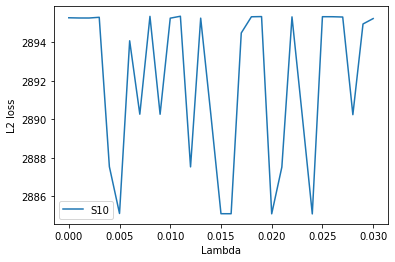

In [8]:
beat_weight0 = np.load('result/beat_weight_4year5_cross10.npy')
non_communal_list = [0]
communal = 10
lamda_range = np.arange(0, 0.031, 0.001)
beat_weight_list = [beat_weight0]
beat_min_index = []
loss_S0 = {}
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = ranking[0:communal]
    C1_test = stock['calibrate']['percentage'].iloc[157:209,stock_index].values
    Y1_test = ibb['calibrate']['lp'].iloc[157:209].values + 2

#result_list0 = 'result/weight3year1_lamda_beat_crossval55.npy'                
#result_list0 = np.load(result_list0)
#Ctest_stock = stock['calibrate']['percentage'].iloc[157:209,stock_index].values
#Ctest_ibb = ibb_amend_pct.iloc[157:209,].values
#Ctest_ibb_lp = ibb['calibrate']['lp'].iloc[157:209,].values
    loss_S0[s] = []
#Ctest = stock['calibrate']['percentage'].iloc[:,stock_index].values 
    for m in range(len(beat_weight_list[weight_index])): 
        relative_percentage = np.dot(C1_test, beat_weight_list[weight_index][m])
        relative_percentage[0] = 0
        relative_percentage = (relative_percentage /100) + 1
        ibb_predict_cross = Y1_test[0] * (relative_percentage.cumprod()) 
    #total_2_norm_diff['validate'][s] = np.sum((ibb_predict['validate'][s] - ibb['validate']['lp']))
        total_2_norm_diff_cross = np.linalg.norm((ibb_predict_cross - Y1_test))
        loss_S0[s].append(total_2_norm_diff_cross)
    print(loss_S0[s])
    min_index_cross = min(range(len(loss_S0[s])), key=loss_S0[s].__getitem__)
    beat_min_index.append(min_index_cross)
    print(min(loss_S0[s]), min_index_cross, lamda_range[min_index_cross])





x_values = lamda_range
y1_values = loss_S0[10]

#plt.figure(figsize=(10,10))
plt.plot( x_values, y1_values, label = "S10")
plt.xlabel('Lambda')
plt.ylabel('L2 loss')
plt.legend()
# show graph
plt.show()



In [9]:
import numpy as np
from scipy import optimize
ibb_predict = defaultdict(defaultdict)
total_2_norm_diff = defaultdict(defaultdict)
non_communal_list = [0]
lamda_range = np.arange(0, 0.031, 0.001)
beat_weight_list = []
for non_communal in non_communal_list:
    communal = 10
    s = communal + non_communal
    weight_index = non_communal_list.index(non_communal)
    #stock_index = ranking[-non_communal:]
    stock_index = ranking[0:communal]
    #stock_index = np.concatenate((ranking[0:communal], ranking[-non_communal:]))
    C2 = stock['calibrate']['percentage'].iloc[:,stock_index].values
    Y2 = np.empty(shape =[0,1] )
    Y2 = ibb['calibrate']['percentage'].iloc[:].values+2
    al = lamda_range[beat_min_index[weight_index]]
    #al = lamda_range[12]

#A = stock['calibrate']['percentage'].iloc[:,stock_index].values 
#Y = ibb['calibrate']['percentage'].iloc[:].values +2
    util = lambda W: np.sum(np.square(Y2 - np.dot(C2,W))) + al * np.linalg.norm(W)  #define utility function
    #util = lambda W: np.sum(np.square(Y - np.dot(A,W)))
    budget1 = lambda W: np.sum(W)-1   #define the budget constraint, so I - p1c1+p2ce>=0
    budget2 = lambda W: W   #define the budget constraint, so I - p1c1+p2ce>=0

    L = []
    for i in range(s):
        L.append(float(1) / s)
  
    initval = np.asarray(L) #set the initial guess for the algorithm, so feasible inital value
    res = optimize.minimize(lambda W: util(W), initval, method='trust-constr', 
                        constraints=[{'type':'eq', 'fun':budget1},{'type':'ineq', 'fun':budget2}] , 
                      tol=1e-9)
    result_test_optimize = res['x']
    beat_weight_list.append(result_test_optimize)
#result_test_optimize = np.save('result/weight8year_lamda_beat_crossval' + str(s) , result_test_optimize)
#result_test_optimize = np.load('result/weight8year_lamda_beat_crossval'+ str(s)+'.npy')

#you need to change your tolerance to see a more accurate solution
#weight_cross_list = 'result/weight_lamda_beat55.npy'
#weight_cross_list= np.load(weight_cross_list)
#loss_S0 = []
    Z = stock['validate']['percentage'].iloc[:,stock_index].values 
    relative_percentage = np.dot(Z, result_test_optimize)
    relative_percentage[0] = 0
    relative_percentage = (relative_percentage /100) + 1
    ibb_predict['validate'][s] = ibb['validate']['lp'][0] * (relative_percentage.cumprod()) 
    total_2_norm_diff['validate'][s] = np.linalg.norm((ibb_predict['validate'][s] - ibb['validate']['lp']))
    print(total_2_norm_diff['validate'][s])

#tracking_differenct_lp = np.sum((ibb_predict['validate'][s] - ibb['validate']['lp']))
#loss_S0.append(total_2_norm_diff['validate'][s])
#print(tracking_differenct_lp)

C:\Users\HP\.conda\envs\work\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


1814.812631622675


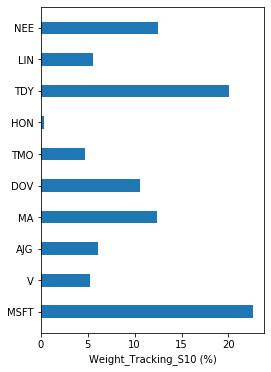

In [10]:
beat_weight_pct = {}
for non_communal in non_communal_list:
    s = 10 + non_communal
    beat_weight_pct[s] = []
    weight_index = non_communal_list.index(non_communal)
    for oo in range(len(beat_weight_list[weight_index])):
        beat_weight_pct[s].append((round(beat_weight_list[weight_index][oo]/np.sum(beat_weight_list[weight_index]),4))*100)
    df = pd.DataFrame.from_dict(beat_weight_pct, orient='index')
    df.to_csv('S10_2020_beat_weight_pct.csv', sep=',', encoding='utf-8')
s = 10
plt.figure(figsize=(4,6))
stock_index = ranking[0:communal]
plt.barh(2*np.arange(len(range(s))),beat_weight_pct[s], tick_label=list(stock['calibrate']['net'].columns[stock_index]))
plt.xlabel('Weight_Tracking_S10 (%)')
plt.show()

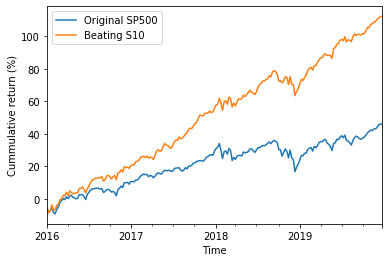

In [17]:
beat_portfolio_cum_return_cal = defaultdict(defaultdict)
index_log_return_cal = np.log((ibb['calibrate']['percentage'])/100+1)
index_cum_return_cal = np.cumsum(index_log_return_cal)*100
ax = pd.Series(index_cum_return_cal.to_numpy(), index=pd.date_range(start='1/1/2016', periods=209, freq='W')).plot(label='Original SP500', legend=True) 
ax.set_xlabel("Time")
ax.set_ylabel("Cummulative return (%)")
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = ranking[0:communal]
    C = stock['calibrate']['percentage'].iloc[:,stock_index].values 
    beat_simple_return_cal = []
    beat_simple_return_cal = np.dot(C, beat_weight_list[weight_index])/100
    beat_log_return_cal = np.log(beat_simple_return_cal +1)
    beat_portfolio_cum_return_cal[s] = np.cumsum(beat_log_return_cal)*100

    ax = pd.Series(beat_portfolio_cum_return_cal[s], index=pd.date_range(start='1/1/2016', periods = 209,freq='W')).plot(label='Beating S'+str(s), legend=True)

14.297208
23.815880348948614


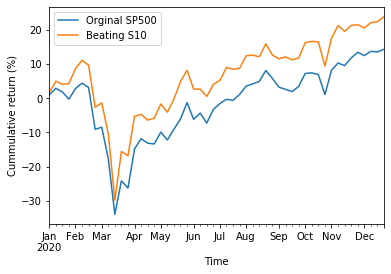

In [11]:

index_log_return = np.log(ibb['validate']['percentage']/100+1)
df = pd.DataFrame(index_log_return)
df.to_csv('S10_2020_index_return.csv', sep=',', encoding='utf-8')
index_cum_return = (np.cumsum(index_log_return))*100
print(index_cum_return[-1])
ax = pd.Series(index_cum_return.to_numpy(), index=pd.date_range(start='1/1/2020', periods=52, freq='W')).plot(label='Orginal SP500', legend=True) 
ax.set_xlabel("Time")
ax.set_ylabel("Cummulative return (%)")
beat_portfolio_cum_return = defaultdict(defaultdict)
for non_communal in non_communal_list:
    #communal = 15
    s = communal + non_communal
    weight_index = non_communal_list.index(non_communal)
    #stock_index = ranking[-non_communal:]
    #stock_index = ranking[0:communal]
    #stock_index = np.concatenate((ranking[0:communal], ranking[-non_communal:]))
    Z = stock['validate']['percentage'].iloc[:,stock_index].values
    df = pd.DataFrame.from_dict(Z)
    df.to_csv('S10_2020_portfolio_return.csv', sep=',', encoding='utf-8')
    beat_simple_return = np.dot(Z,  beat_weight_list[weight_index])/100
    beat_log_return = np.log( beat_simple_return +1)
    beat_portfolio_cum_return[s] = (np.cumsum(beat_log_return))*100
    print( beat_portfolio_cum_return[s][-1] )
    ax = pd.Series(beat_portfolio_cum_return[s], index=pd.date_range(start='1/1/2020', periods =52,freq='W')).plot(label='Beating S'+str(s), legend=True)



In [125]:
#ibb_amend_pct = np.empty(shape =[0,1] )
#ibb_amend_pct = ibb['calibrate']['percentage'].copy(deep=True)
#ibb_amend_pct = ibb_amend_pct+2
#ibb_amend_pct[ibb_amend_pct > 0] = ibb_amend_pct + 1
#ibb_amend_pct[ibb_amend_pct < -5] = 5
#ibb_amend_pct[ibb_amend_pct < -2] = 2
#print(ibb_amend_pct.values)
#print(ibb['calibrate']['percentage'].values)
#print(np.array(communal_information)[ranking[:20]])
#print(stock['calibrate']['net'].iloc[:,ranking[f]].name for f in ranking[:20])
#print(list(stock['calibrate']['net'].columns[ranking[:20]]))
#plt.xlabel('L2 Loss'))
#print(2*np.arange(len(communal_information[:20])))
#print(2*np.arange(len(communal_information[:20])))

# Plot most communal stocks

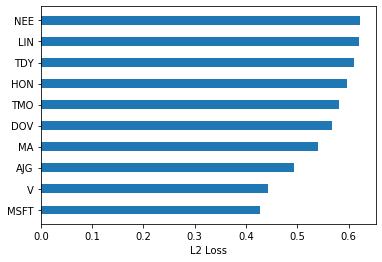

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
#lt.barh(2*np.arange(len(communal_information[:20])), communal_information[ranking[:20]],tick_label=stock['calibrate']['net'].columns[ranking[:20])
#tick_label=stock['calibrate']['net'].iloc[:,ranking[:20].name
plt.barh(2*np.arange(len(communal_information[:10])),np.array(communal_information)[ranking[:10]], tick_label=list(stock['calibrate']['net'].columns[ranking[:10]]))
plt.xlabel('L2 Loss')
plt.show()

# Plot least communal stocks

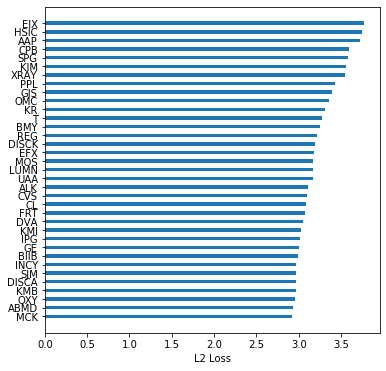

In [6]:

plt.figure(figsize=(6,6))

plt.barh(2*np.arange(len(communal_information[-35:])),np.array(communal_information)[ranking[-35:]], tick_label=list(stock['calibrate']['net'].columns[ranking[-35:]]))
plt.xlabel('L2 Loss')
plt.show()


In [21]:

#x = np.arange(len(communal_information[-20:]))  # the label locations
#width = 0.5  # the width of the bars

#fig, ax = plt.subplots()
#rects1 = ax.bar(x, np.array(communal_information)[ranking[-20:]])


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('L2 Loss')

#ax.set_xticks(x)
#ax.set_xticklabels(list(stock['calibrate']['net'].columns[ranking[-65:]]),  fontsize=7)

#fig.tight_layout()

#plt.show()


Text(0, 0.5, 'Normalized price')

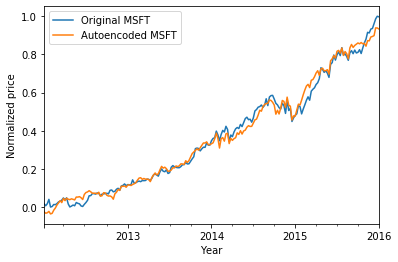

In [36]:
# KHANH DEBUG
which_stock = 289

# now decoded last price plot
stock_autoencoder = copy.deepcopy(reconstruct[:, which_stock])
#stock_autoencoder[0] = 0
#stock_autoencoder = stock_autoencoder.cumsum()
#stock_autoencoder += (stock['calibrate']['lp'].iloc[0, which_stock])

#pd.Series(stock['calibrate']['lp'].iloc[:, which_stock], index=pd.date_range(start='1/8/2012', periods=N_train, freq='W')).plot(label='stock original', legend=True)
ax = pd.Series(data[:, which_stock], index=pd.date_range(start='1/8/2012', periods=N_train, freq='W')).plot(label='Original ' + stock['calibrate']['net'].iloc[:,which_stock].name, legend=True)
ax = pd.Series(stock_autoencoder, index=pd.date_range(start='1/8/2012', periods = N_train,freq='W')).plot(label='Autoencoded ' + stock['calibrate']['net'].iloc[:,which_stock].name, legend=True)
ax.set_xlabel("Year")
ax.set_ylabel("Normalized price")

Text(0, 0.5, 'Normalized price')

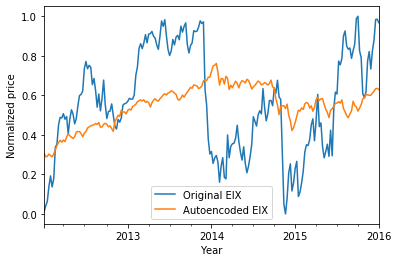

In [8]:
# KHANH DEBUG
which_stock = 149

# now decoded last price plot
stock_autoencoder = copy.deepcopy(reconstruct[:, which_stock])
#stock_autoencoder[0] = 0
#stock_autoencoder = stock_autoencoder.cumsum()
#stock_autoencoder += (stock['calibrate']['lp'].iloc[0, which_stock])

#pd.Series(stock['calibrate']['lp'].iloc[:, which_stock], index=pd.date_range(start='1/8/2012', periods=N_train, freq='W')).plot(label='stock original', legend=True)
ax = pd.Series(data[:, which_stock], index=pd.date_range(start='1/8/2012', periods=N_train, freq='W')).plot(label='Original ' + stock['calibrate']['net'].iloc[:,which_stock].name, legend=True)
ax = pd.Series(stock_autoencoder, index=pd.date_range(start='1/8/2012', periods = N_train,freq='W')).plot(label='Autoencoded ' + stock['calibrate']['net'].iloc[:,which_stock].name, legend=True)
ax.set_xlabel("Year")
ax.set_ylabel("Normalized price")

In [665]:
print(ibb['calibrate']['percentage'].iloc[:314])

Date
1/3/2016     -5.964457
1/10/2016    -2.169585
1/17/2016     1.413054
1/24/2016     1.748386
1/31/2016    -3.102190
                ...   
12/1/2019     0.156955
12/8/2019     0.727616
12/15/2019    1.654251
12/22/2019    0.583631
12/29/2019   -0.159564
Name: PERCENTAGE, Length: 209, dtype: float32


# TRACK: Validate phase - origin weight over 3 year 

In [666]:
#result_list0 = np.save('result/weight_lamda_beat' + str(s) , result_list0)
import numpy as np
from scipy import optimize
#non_communal_list = [25, 35, 45]
#stock_index = np.concatenate((ranking[0:20], ranking[-non_communal_list[0]:]))
#s = 20 + non_communal_list[0]
#C1 = stock['calibrate']['percentage'].iloc[0:157,stock_index].values
#Y1 = ibb['calibrate']['percentage'].values
#result_list0 = []
non_communal_list = [15, 25, 35]
lamda_range = np.arange(0, 0.031, 0.001)
result_list0 = []
for non_communal in non_communal_list:
    s = 10 + non_communal
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    C1 = stock['calibrate']['percentage'].iloc[0:157,stock_index].values
    Y1 = ibb['calibrate']['percentage'].iloc[:157].values
    result_list0 = []
    for k in range(len(lamda_range)):
        al = lamda_range[k]
        Nstock = s

        util = lambda W: np.sum(np.square(Y1 - np.dot(C1,W))) + al * np.linalg.norm(W)  #define utility function
    #util = lambda W: np.sum(np.square(Y - np.dot(A,W)))
        budget1 = lambda W: np.sum(W)-1   #define the budget constraint, so I - p1c1+p2ce>=0
        budget2 = lambda W: W   #define the budget constraint, so I - p1c1+p2ce>=0

        L = []
        for i in range(Nstock):
            L.append(float(1) / Nstock)
      
        #print(lamda_range[k],' processing')
        initval = np.asarray(L) #set the initial guess for the algorithm, so feasible inital value
        res = optimize.minimize(lambda W: util(W), initval, method='trust-constr', 
                        constraints=[{'type':'eq', 'fun':budget1},{'type':'ineq', 'fun':budget2}] , 
                      tol=1e-9) #you need to change your tolerance to see a more accurate solution
        print(lamda_range[k],'Done')
        result_list0.append(res['x'])
    #print(res['x'])
    np.save('result/origin_weight_4year5_cross' + str(s), result_list0)


0.0 Done
0.001 Done
0.002 Done
0.003 Done
0.004 Done
0.005 Done
0.006 Done
0.007 Done
0.008 Done
0.009000000000000001 Done
0.01 Done
0.011 Done
0.012 Done
0.013000000000000001 Done
0.014 Done
0.015 Done
0.016 Done
0.017 Done
0.018000000000000002 Done
0.019 Done
0.02 Done
0.021 Done
0.022 Done
0.023 Done
0.024 Done
0.025 Done
0.026000000000000002 Done
0.027 Done
0.028 Done
0.029 Done
0.03 Done
0.0 Done
0.001 Done
0.002 Done
0.003 Done
0.004 Done
0.005 Done
0.006 Done
0.007 Done
0.008 Done
0.009000000000000001 Done
0.01 Done
0.011 Done
0.012 Done
0.013000000000000001 Done
0.014 Done
0.015 Done
0.016 Done
0.017 Done
0.018000000000000002 Done
0.019 Done
0.02 Done
0.021 Done
0.022 Done
0.023 Done
0.024 Done
0.025 Done
0.026000000000000002 Done
0.027 Done
0.028 Done
0.029 Done
0.03 Done
0.0 Done
0.001 Done
0.002 Done
0.003 Done
0.004 Done
0.005 Done
0.006 Done
0.007 Done
0.008 Done
0.009000000000000001 Done
0.01 Done
0.011 Done
0.012 Done
0.013000000000000001 Done
0.014 Done
0.015 Done
0.016

# TRACK: Validate phase: find min lamda in 4th year

In [10]:
tracking_weight0 = np.load('result/origin_weight_4year5_cross25.npy')
tracking_weight1 = np.load('result/origin_weight_4year5_cross35.npy')
tracking_weight2 = np.load('result/origin_weight_4year5_cross45.npy')
tracking_weight_list = [tracking_weight0, tracking_weight1, tracking_weight2]
track_min_index = []
non_communal_list = [15, 25, 35]
lamda_range = np.arange(0, 0.031, 0.001)
loss_S0 = {}
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    C1_test = stock['calibrate']['percentage'].iloc[157:209,stock_index].values
    Y1_test = ibb['calibrate']['lp'].iloc[157:209].values

#result_list0 = 'result/weight3year1_lamda_beat_crossval55.npy'                
#result_list0 = np.load(result_list0)
#Ctest_stock = stock['calibrate']['percentage'].iloc[157:209,stock_index].values
#Ctest_ibb = ibb_amend_pct.iloc[157:209,].values
#Ctest_ibb_lp = ibb['calibrate']['lp'].iloc[157:209,].values
    #loss_S0 = []
#Ctest = stock['calibrate']['percentage'].iloc[:,stock_index].values 
    loss_S0[s] = []
    for m in range(len(tracking_weight_list[weight_index])): 
        relative_percentage = np.dot(C1_test, tracking_weight_list[weight_index][m])
        relative_percentage[0] = 0
        relative_percentage = (relative_percentage /100) + 1
        ibb_predict_cross = Y1_test[0] * (relative_percentage.cumprod()) 
    #total_2_norm_diff['validate'][s] = np.sum((ibb_predict['validate'][s] - ibb['validate']['lp']))
        total_2_norm_diff_cross = np.linalg.norm((ibb_predict_cross - Y1_test))
        loss_S0[s].append(total_2_norm_diff_cross)
    print(loss_S0[s])
    min_index_cross = min(range(len(loss_S0[s])), key=loss_S0[s].__getitem__)
    track_min_index.append(min_index_cross)
    print(min(loss_S0[s]), min_index_cross, lamda_range[min_index_cross])





[1606.2732763012536, 1605.3517662373222, 1606.09708808423, 1609.4697275343433, 1605.9331191324607, 1605.4708953262561, 1605.4018546379139, 1606.7607613276086, 1606.1855805454131, 1605.3751595577553, 1611.8304256944796, 1610.4609785997059, 1606.498994736243, 1609.469609875397, 1606.762855398208, 1605.4050032270236, 1605.4784905626655, 1606.450177058503, 1605.410477701018, 1606.3911197404002, 1605.3259341495088, 1605.0253126749308, 1605.399005827429, 1606.4160696614686, 1606.2471089601956, 1605.595462622712, 1605.4128154401753, 1606.3424465635724, 1605.3940212184227, 1605.4815873254818, 1606.6455606867942]
1605.0253126749308 21 0.021
[1441.3182077408158, 1441.6687404762795, 1441.6522886316989, 1441.7872103824361, 1441.6632817098907, 1441.3208703587218, 1441.3852264576415, 1441.6483454340607, 1440.4459443414087, 1441.8982727823347, 1441.6705560830035, 1440.1758790938384, 1441.6318100684384, 1441.281728639673, 1440.7950068489956, 1440.4169181609557, 1441.645567519007, 1440.4530953238516, 1

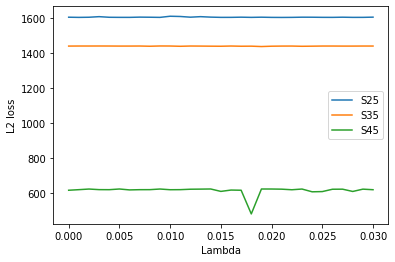

In [11]:
x_values = lamda_range
y1_values = loss_S0[25]
y2_values = loss_S0[35]
y3_values = loss_S0[45]
#plt.figure(figsize=(10,10))
plt.plot( x_values, y1_values, label = "S25")
plt.plot( x_values, y2_values, label = "S35")
plt.plot( x_values, y3_values, label = "S45")
# show legend

plt.xlabel('Lambda')
plt.ylabel('L2 loss')
plt.legend()
# show graph
plt.show()

In [7]:
#track_min_index = [12, 15, 12]

# TRACK: Cablibrate phase: find weight over 7 years

In [12]:
import numpy as np
from scipy import optimize
ibb_predict = defaultdict(defaultdict)
total_2_norm_diff = defaultdict(defaultdict)
non_communal_list = [15, 25, 35]
lamda_range = np.arange(0, 0.031, 0.001)
track_weight_list = []
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    C2 = stock['calibrate']['percentage'].iloc[:,stock_index].values
    Y2 = ibb['calibrate']['percentage'].iloc[:].values

    al = lamda_range[track_min_index[weight_index]]

#A = stock['calibrate']['percentage'].iloc[:,stock_index].values 
#Y = ibb['calibrate']['percentage'].iloc[:].values +2
    util = lambda W: np.sum(np.square(Y2 - np.dot(C2,W))) + al * np.linalg.norm(W)  #define utility function
    #util = lambda W: np.sum(np.square(Y - np.dot(A,W)))
    budget1 = lambda W: np.sum(W)-1   #define the budget constraint, so I - p1c1+p2ce>=0
    budget2 = lambda W: W   #define the budget constraint, so I - p1c1+p2ce>=0

    L = []
    for i in range(s):
        L.append(float(1) / s)
  
    initval = np.asarray(L) #set the initial guess for the algorithm, so feasible inital value
    res = optimize.minimize(lambda W: util(W), initval, method='trust-constr', 
                        constraints=[{'type':'eq', 'fun':budget1},{'type':'ineq', 'fun':budget2}] , 
                      tol=1e-9)
    result_test_optimize = res['x']
    track_weight_list.append(result_test_optimize)
#result_test_optimize = np.save('result/weight8year_lamda_beat_crossval' + str(s) , result_test_optimize)
#result_test_optimize = np.load('result/weight8year_lamda_beat_crossval'+ str(s)+'.npy')

#you need to change your tolerance to see a more accurate solution
#weight_cross_list = 'result/weight_lamda_beat55.npy'
#weight_cross_list= np.load(weight_cross_list)
#loss_S0 = []
    Z = stock['validate']['percentage'].iloc[:,stock_index].values 
    relative_percentage = np.dot(Z, result_test_optimize)
    
    relative_percentage[0] = 0
    relative_percentage = (relative_percentage /100) + 1
    ibb_predict['validate'][s] = ibb['validate']['lp'][0] * (relative_percentage.cumprod()) 
    total_2_norm_diff['validate'][s] = np.linalg.norm((ibb_predict['validate'][s] - ibb['validate']['lp']))
    print(total_2_norm_diff['validate'][s])

#tracking_differenct_lp = np.sum((ibb_predict['validate'][s] - ibb['validate']['lp']))
#loss_S0.append(total_2_norm_diff['validate'][s])
#print(tracking_differenct_lp)

C:\Users\HP\.conda\envs\work\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


451.61780834989787
441.6667695494866
842.2133646343048


[0.13856174 0.12404915 0.00652251 0.06191613 0.06351141 0.07623142
 0.05996714 0.06520105 0.05926101 0.00219263 0.03318617 0.00102149
 0.04943285 0.08871982 0.02289725 0.04357023 0.00180806 0.00115644
 0.0191489  0.00060188 0.04030756 0.00020995 0.02154165 0.00216646
 0.0168171 ]


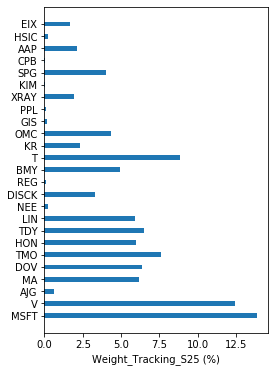

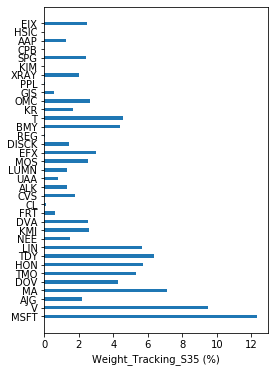

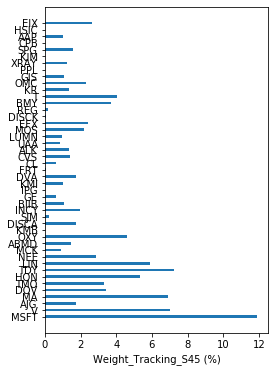

In [13]:
print(track_weight_list[0])
track_weight_pct = {}
for non_communal in non_communal_list:
    s = 10 + non_communal
    track_weight_pct[s] = []
    weight_index = non_communal_list.index(non_communal)
    
    for oo in range(len(track_weight_list[weight_index])):
    #weight_pct25 = track_weight_list[0][oo]/np.sum(track_weight_list[0])
        track_weight_pct[s].append((round(track_weight_list[weight_index][oo]/np.sum(track_weight_list[weight_index]),4))*100)
track_weight_pct['ID'] = stock['calibrate']['net'].columns[stock_index]
#print(track_weight_pct)
#df = pd.DataFrame.from_dict(track_weight_pct, orient='index')
#df.to_csv('track_weight_pct.csv', sep=',', encoding='utf-8')
#df = df.transpose
s = 25
plt.figure(figsize=(4,6))
stock_index = np.concatenate((ranking[0:10], ranking[-15:]))
#lt.barh(2*np.arange(len(communal_information[:20])), communal_information[ranking[:20]],tick_label=stock['calibrate']['net'].columns[ranking[:20])
#tick_label=stock['calibrate']['net'].iloc[:,ranking[:20].name
#print(stock_index)
plt.barh(2*np.arange(len(range(s))),track_weight_pct[s], tick_label=list(stock['calibrate']['net'].columns[stock_index]))
plt.xlabel('Weight_Tracking_S25 (%)')
plt.show()


s = 35
plt.figure(figsize=(4,6))
stock_index = np.concatenate((ranking[0:10], ranking[-25:]))
#lt.barh(2*np.arange(len(communal_information[:20])), communal_information[ranking[:20]],tick_label=stock['calibrate']['net'].columns[ranking[:20])
#tick_label=stock['calibrate']['net'].iloc[:,ranking[:20].name
#print(stock_index)
plt.barh(2*np.arange(len(range(s))),track_weight_pct[s], tick_label=list(stock['calibrate']['net'].columns[stock_index]))
plt.xlabel('Weight_Tracking_S35 (%)')
plt.show()
#print(df)

s = 45
plt.figure(figsize=(4,6))
stock_index = np.concatenate((ranking[0:10], ranking[-35:]))
#lt.barh(2*np.arange(len(communal_information[:20])), communal_information[ranking[:20]],tick_label=stock['calibrate']['net'].columns[ranking[:20])
#tick_label=stock['calibrate']['net'].iloc[:,ranking[:20].name
#print(stock_index)
plt.barh(2*np.arange(len(range(s))),track_weight_pct[s], tick_label=list(stock['calibrate']['net'].columns[stock_index]))
plt.xlabel('Weight_Tracking_S45 (%)')
plt.show()
#print(track_weight_pct)

In [247]:
#print( track_portfolio_cum_return_cal[25])
#print(track_simple_return_cal)

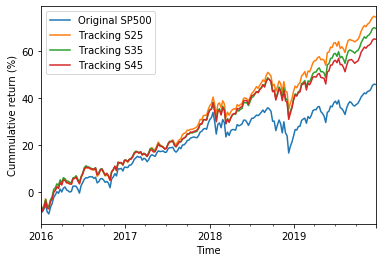

In [21]:
portfolio_num = [45, 55, 65]
track_portfolio_cum_return_cal = defaultdict(defaultdict)
index_log_return_cal = np.log((ibb['calibrate']['percentage'])/100+1)
index_cum_return_cal = np.cumsum(index_log_return_cal)*100
ax = pd.Series(index_cum_return_cal.to_numpy(), index=pd.date_range(start='1/1/2016', periods=209, freq='W')).plot(label='Original SP500', legend=True) 
ax.set_xlabel("Time")
ax.set_ylabel("Cummulative return (%)")
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    C = stock['calibrate']['percentage'].iloc[:,stock_index].values 
    track_simple_return_cal = []
    track_simple_return_cal = np.dot(C, track_weight_list[weight_index])/100
    track_log_return_cal = np.log(track_simple_return_cal +1)
    track_portfolio_cum_return_cal[s] = np.cumsum(track_log_return_cal)*100

    ax = pd.Series(track_portfolio_cum_return_cal[s], index=pd.date_range(start='1/1/2016', periods = 209,freq='W')).plot(label='Tracking S'+str(s), legend=True)

S25 2-norm difference:  1230.0245400187976
S35 2-norm difference:  1148.882013438148
S45 2-norm difference:  1344.195423968521


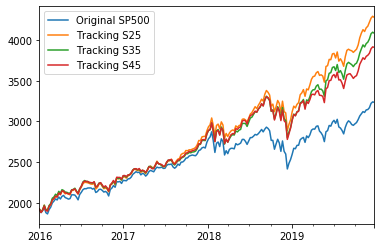

In [22]:
ax = pd.Series(ibb['calibrate']['lp'].to_numpy(), index=pd.date_range(start='1/1/2016', periods=209, freq='W')).plot(label='Original SP500', legend=True) 

for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    C = stock['calibrate']['percentage'].iloc[:,stock_index].values 
    track_simple_return_cal = np.dot(C, track_weight_list[weight_index])
    track_simple_return_cal[0] = 0
    track_simple_return_cal = (track_simple_return_cal /100) + 1
    ibb_predict['calibrate'][s] = ibb['calibrate']['lp'][0] * (track_simple_return_cal.cumprod()) 
    total_2_norm_diff['calibrate'][s] = np.linalg.norm((ibb_predict['calibrate'][s] - ibb['calibrate']['lp']))
    ax = pd.Series(ibb_predict['calibrate'][s], index=pd.date_range(start='1/1/2016', periods = 209,freq='W')).plot(label='Tracking S'+str(s), legend=True)
    print("S" +str(s) + " 2-norm difference: ", total_2_norm_diff['validate'][s])

# TRACK Plot: closing price

S25 2-norm difference:  451.61780834989787
S35 2-norm difference:  441.6667695494866
S45 2-norm difference:  842.2133646343048


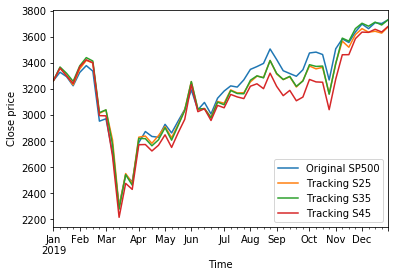

In [674]:
ax = pd.Series(ibb['validate']['lp'].to_numpy(), index=pd.date_range(start='1/1/2019', periods=52, freq='W')).plot(label='Original SP500', legend=True) 
ax.set_xlabel("Time")
ax.set_ylabel("Close price")
for s in [25, 35, 45]:
    ax = pd.Series(ibb_predict['validate'][s], index=pd.date_range(start='1/1/2019', periods = 52,freq='W')).plot(label='Tracking S'+str(s), legend=True)
    print("S" +str(s) + " 2-norm difference: ", total_2_norm_diff['validate'][s])  

# TRACK :Plot cum return 

14.297208
12.968958504080637
14.522237692493798
13.468568071338884


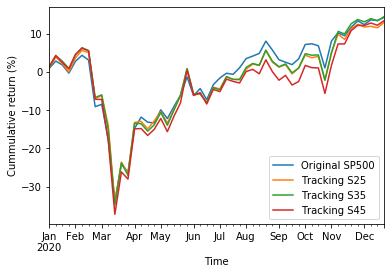

In [26]:
portfolio_num = [45, 55, 65]
track_portfolio_cum_return = defaultdict(defaultdict)
index_log_return = np.log(ibb['validate']['percentage']/100+1)
index_cum_return = np.cumsum(index_log_return)*100
ax = pd.Series(index_cum_return.to_numpy(), index=pd.date_range(start='1/1/2020', periods=52, freq='W')).plot(label='Original SP500', legend=True) 
ax.set_xlabel("Time")
ax.set_ylabel("Cummulative return (%)")
print(index_cum_return[-1])
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    Z = stock['validate']['percentage'].iloc[:,stock_index].values 
    track_simple_return = np.dot(Z, track_weight_list[weight_index])/100
    track_log_return = np.log(track_simple_return +1)
    track_portfolio_cum_return[s] = np.cumsum(track_log_return)*100
    print(track_portfolio_cum_return[s][-1])

for s in [25, 35, 45]:
#pd.Series(ibbx.to_numpy(), index=pd.date_range(start='9/1/2019', periods=52, freq='W')).plot(label='IBB original', legend=True) 
    ax = pd.Series( track_portfolio_cum_return[s], index=pd.date_range(start='1/1/2020', periods = 52,freq='W')).plot(label='Tracking S'+str(s), legend=True)
#for l in range(len(track_cum_return3)):
    #if (track_cum_return3[l] < index_cum_return3[l]):
        #print(l, track_cum_return3[l], index_cum_return3[l])
#print(track_cum_return3)
#print(index_cum_return3)

# BEAT: Validate phase -  weight over 3 year 

In [677]:
#result_list0 = np.save('result/weight_lamda_beat' + str(s) , result_list0)
import numpy as np
from scipy import optimize
#non_communal_list = [25, 35, 45]
#stock_index = np.concatenate((ranking[0:20], ranking[-non_communal_list[0]:]))
#s = 20 + non_communal_list[0]
#C1 = stock['calibrate']['percentage'].iloc[0:157,stock_index].values
#Y1 = ibb['calibrate']['percentage'].values
#result_list0 = []
non_communal_list = [15, 25, 35]
lamda_range = np.arange(0, 0.031, 0.001)
result_list0 = []
for non_communal in non_communal_list:
    s = 10 + non_communal
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    C1 = stock['calibrate']['percentage'].iloc[0:157,stock_index].values
    Y1 = ibb['calibrate']['percentage'].iloc[:157].values + 2
    result_list0 = []
    for k in range(len(lamda_range)):
        al = lamda_range[k]
        Nstock = s

        util = lambda W: np.sum(np.square(Y1 - np.dot(C1,W))) + al * np.linalg.norm(W)  #define utility function
    #util = lambda W: np.sum(np.square(Y - np.dot(A,W)))
        budget1 = lambda W: np.sum(W)-1   #define the budget constraint, so I - p1c1+p2ce>=0
        budget2 = lambda W: W   #define the budget constraint, so I - p1c1+p2ce>=0

        L = []
        for i in range(Nstock):
            L.append(float(1) / Nstock)
      
        #print(lamda_range[k],' processing')
        initval = np.asarray(L) #set the initial guess for the algorithm, so feasible inital value
        res = optimize.minimize(lambda W: util(W), initval, method='trust-constr', 
                        constraints=[{'type':'eq', 'fun':budget1},{'type':'ineq', 'fun':budget2}] , 
                      tol=1e-9) #you need to change your tolerance to see a more accurate solution
        print(lamda_range[k],'Done')
        result_list0.append(res['x'])
    #print(res['x'])
    np.save('result/beat_weight_4year5_cross' + str(s), result_list0)


C:\Users\HP\.conda\envs\work\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


0.0 Done
0.001 Done
0.002 Done
0.003 Done
0.004 Done
0.005 Done
0.006 Done
0.007 Done
0.008 Done
0.009000000000000001 Done
0.01 Done
0.011 Done
0.012 Done
0.013000000000000001 Done
0.014 Done
0.015 Done
0.016 Done
0.017 Done
0.018000000000000002 Done
0.019 Done
0.02 Done
0.021 Done
0.022 Done
0.023 Done
0.024 Done
0.025 Done
0.026000000000000002 Done
0.027 Done
0.028 Done
0.029 Done
0.03 Done
0.0 Done
0.001 Done
0.002 Done
0.003 Done
0.004 Done
0.005 Done
0.006 Done
0.007 Done
0.008 Done
0.009000000000000001 Done
0.01 Done
0.011 Done
0.012 Done
0.013000000000000001 Done
0.014 Done
0.015 Done
0.016 Done
0.017 Done
0.018000000000000002 Done
0.019 Done
0.02 Done
0.021 Done
0.022 Done
0.023 Done
0.024 Done
0.025 Done
0.026000000000000002 Done
0.027 Done
0.028 Done
0.029 Done
0.03 Done
0.0 Done
0.001 Done
0.002 Done
0.003 Done
0.004 Done
0.005 Done
0.006 Done
0.007 Done
0.008 Done
0.009000000000000001 Done
0.01 Done
0.011 Done
0.012 Done
0.013000000000000001 Done
0.014 Done
0.015 Done
0.016

# BEAT: Validate phase: find min lamda in 4th year

In [17]:
beat_weight0 = np.load('result/beat_weight_4year5_cross25.npy')
beat_weight1 = np.load('result/beat_weight_4year5_cross35.npy')
beat_weight2 = np.load('result/beat_weight_4year5_cross45.npy')
beat_weight_list = [beat_weight0, beat_weight1, beat_weight2]
beat_min_index = []
loss_S0 = {}
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    C1_test = stock['calibrate']['percentage'].iloc[157:209,stock_index].values
    Y1_test = ibb['calibrate']['lp'].iloc[157:209].values + 2

#result_list0 = 'result/weight3year1_lamda_beat_crossval55.npy'                
#result_list0 = np.load(result_list0)
#Ctest_stock = stock['calibrate']['percentage'].iloc[157:209,stock_index].values
#Ctest_ibb = ibb_amend_pct.iloc[157:209,].values
#Ctest_ibb_lp = ibb['calibrate']['lp'].iloc[157:209,].values
    loss_S0[s] = []
#Ctest = stock['calibrate']['percentage'].iloc[:,stock_index].values 
    for m in range(len(beat_weight_list[weight_index])): 
        relative_percentage = np.dot(C1_test, beat_weight_list[weight_index][m])
        relative_percentage[0] = 0
        relative_percentage = (relative_percentage /100) + 1
        ibb_predict_cross = Y1_test[0] * (relative_percentage.cumprod()) 
    #total_2_norm_diff['validate'][s] = np.sum((ibb_predict['validate'][s] - ibb['validate']['lp']))
        total_2_norm_diff_cross = np.linalg.norm((ibb_predict_cross - Y1_test))
        loss_S0[s].append(total_2_norm_diff_cross)
    print(loss_S0[s])
    min_index_cross = min(range(len(loss_S0[s])), key=loss_S0[s].__getitem__)
    beat_min_index.append(min_index_cross)
    print(min(loss_S0[s]), min_index_cross, lamda_range[min_index_cross])





[2657.811189745177, 2657.8095916655025, 2481.3130798421594, 2657.806470408027, 2481.3706148246433, 2657.8033333876183, 2620.5844740150337, 2613.8237086981617, 2538.024283937849, 2615.7777633895003, 2595.854844097105, 2657.794031576476, 2538.014961822451, 2650.4184221666237, 2657.7891744775025, 2538.0415844477775, 2481.3467320739387, 2481.4261772361515, 2613.7687288021516, 2657.7812802103217, 2481.363669050785, 2602.9375359046967, 2657.776491343644, 2538.0309145705055, 2481.377611935752, 2481.2802070744096, 2481.5272704500517, 2657.7686743608206, 2602.907038105636, 2537.993383454457, 2657.763786195187]
2481.2802070744096 25 0.025
[2401.0841074237196, 2390.974161916356, 2283.570649615072, 2401.080096744276, 2401.0599481114014, 2349.3279982433573, 2283.3711365652703, 2352.517474439144, 2241.286745938893, 2240.434291752422, 2401.057424701321, 2400.978639889585, 2401.066659999693, 2231.560121935529, 2400.544058183003, 2401.061159469955, 2266.266630926646, 2401.057460412275, 2274.12082431648

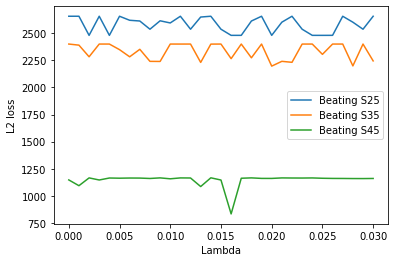

In [18]:
x_values = lamda_range
y1_values = loss_S0[25]
y2_values = loss_S0[35]
y3_values = loss_S0[45]
plt.plot( x_values, y1_values, label = "Beating S25")
plt.plot( x_values, y2_values, label = "Beating S35")
plt.plot( x_values, y3_values, label = "Beating S45")
# show legend

plt.xlabel('Lambda')
plt.ylabel('L2 loss')
plt.legend()
# show graph
plt.show()

# BEAT: Cablibrate phase: find weight over 4 years

In [11]:
beat_min_index = [15, 12, 12]
#print(ibb['calibrate']['percentage'].iloc[:].values)
#print(Y2)
#beat_simple_return_cal
#pd.Series(Y2, index=pd.date_range(start='1/1/2019', periods=366, freq='W')).plot(label='Amended SP500', legend=True) 
#pd.Series(ibb['calibrate']['percentage'].to_numpy(), index=pd.date_range(start='1/1/2019', periods=366, freq='W')).plot(label='Original SP500', legend=True)
#pd.Series(beat_simple_return_cal*100, index=pd.date_range(start='1/1/2019', periods=366, freq='W')).plot(label='Port', legend=True) 

In [19]:
import numpy as np
from scipy import optimize
ibb_predict = defaultdict(defaultdict)
total_2_norm_diff = defaultdict(defaultdict)
non_communal_list = [15, 25, 35]
lamda_range = np.arange(0, 0.031, 0.001)
beat_weight_list = []
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    C2 = stock['calibrate']['percentage'].iloc[:,stock_index].values
    Y2 = np.empty(shape =[0,1] )
    Y2 = ibb['calibrate']['percentage'].iloc[:].values+2

    al = lamda_range[beat_min_index[weight_index]]

#A = stock['calibrate']['percentage'].iloc[:,stock_index].values 
#Y = ibb['calibrate']['percentage'].iloc[:].values +2
    util = lambda W: np.sum(np.square(Y2 - np.dot(C2,W))) + al * np.linalg.norm(W)  #define utility function
    #util = lambda W: np.sum(np.square(Y - np.dot(A,W)))
    budget1 = lambda W: np.sum(W)-1   #define the budget constraint, so I - p1c1+p2ce>=0
    budget2 = lambda W: W   #define the budget constraint, so I - p1c1+p2ce>=0

    L = []
    for i in range(s):
        L.append(float(1) / s)
  
    initval = np.asarray(L) #set the initial guess for the algorithm, so feasible inital value
    res = optimize.minimize(lambda W: util(W), initval, method='trust-constr', 
                        constraints=[{'type':'eq', 'fun':budget1},{'type':'ineq', 'fun':budget2}] , 
                      tol=1e-9)
    result_test_optimize = res['x']
    beat_weight_list.append(result_test_optimize)
#result_test_optimize = np.save('result/weight8year_lamda_beat_crossval' + str(s) , result_test_optimize)
#result_test_optimize = np.load('result/weight8year_lamda_beat_crossval'+ str(s)+'.npy')

#you need to change your tolerance to see a more accurate solution
#weight_cross_list = 'result/weight_lamda_beat55.npy'
#weight_cross_list= np.load(weight_cross_list)
#loss_S0 = []
    Z = stock['validate']['percentage'].iloc[:,stock_index].values 
    relative_percentage = np.dot(Z, result_test_optimize)
    relative_percentage[0] = 0
    relative_percentage = (relative_percentage /100) + 1
    ibb_predict['validate'][s] = ibb['validate']['lp'][0] * (relative_percentage.cumprod()) 
    total_2_norm_diff['validate'][s] = np.linalg.norm((ibb_predict['validate'][s] - ibb['validate']['lp']))
    print(total_2_norm_diff['validate'][s])

#tracking_differenct_lp = np.sum((ibb_predict['validate'][s] - ibb['validate']['lp']))
#loss_S0.append(total_2_norm_diff['validate'][s])
#print(tracking_differenct_lp)

C:\Users\HP\.conda\envs\work\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


1230.0245400187976
1148.882013438148
1344.195423968521


In [189]:
print(stock_index)
print(non_communal)
print(C2[0])

[211 274 289 388   3 371 219 294 435 176]
0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


[2.08801322e-01 2.99954587e-02 5.27266215e-02 1.39660793e-01
 8.59225948e-02 5.00991429e-02 2.90123155e-06 2.00801864e-01
 4.87163173e-02 1.10205097e-01 3.93450212e-02 6.01860650e-07
 1.25418488e-06 3.07481497e-02 1.21488277e-06 6.46236011e-06
 6.58301254e-07 8.37025550e-07 9.19286321e-07 5.83574496e-07
 6.92742474e-07 5.47000881e-07 2.95835673e-03 1.25251244e-06
 1.33699696e-06]


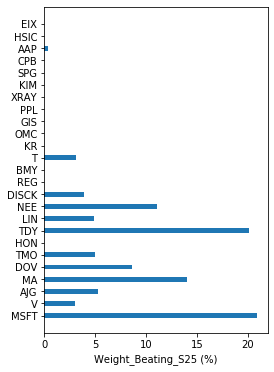

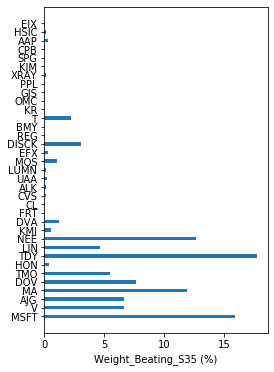

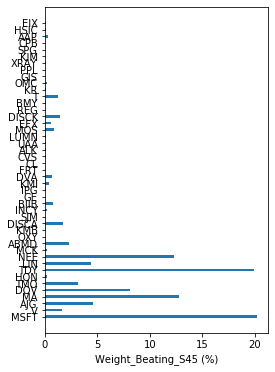

In [27]:
print(beat_weight_list[0])
beat_weight_pct = {}
for non_communal in non_communal_list:
    s = 10 + non_communal
    beat_weight_pct[s] = []
    weight_index = non_communal_list.index(non_communal)
    for oo in range(len(beat_weight_list[weight_index])):
        beat_weight_pct[s].append((round(beat_weight_list[weight_index][oo]/np.sum(beat_weight_list[weight_index]),4))*100)

s = 25
plt.figure(figsize=(4,6))
stock_index = np.concatenate((ranking[0:10], ranking[-15:]))
plt.barh(2*np.arange(len(range(s))),beat_weight_pct[s], tick_label=list(stock['calibrate']['net'].columns[stock_index]))
plt.xlabel('Weight_Beating_S25 (%)')
plt.show()


s = 35
plt.figure(figsize=(4,6))
stock_index = np.concatenate((ranking[0:10], ranking[-25:]))
plt.barh(2*np.arange(len(range(s))),beat_weight_pct[s], tick_label=list(stock['calibrate']['net'].columns[stock_index]))
plt.xlabel('Weight_Beating_S35 (%)')
plt.show()


s = 45
plt.figure(figsize=(4,6))
stock_index = np.concatenate((ranking[0:10], ranking[-35:]))
plt.barh(2*np.arange(len(range(s))),beat_weight_pct[s], tick_label=list(stock['calibrate']['net'].columns[stock_index]))
plt.xlabel('Weight_Beating_S45 (%)')
plt.show()


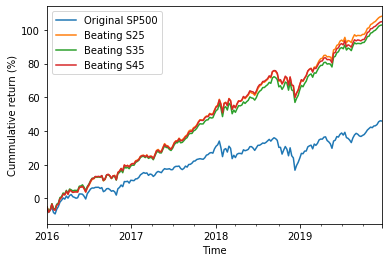

In [28]:
beat_portfolio_cum_return_cal = defaultdict(defaultdict)
index_log_return_cal = np.log((ibb['calibrate']['percentage'])/100+1)
index_cum_return_cal = np.cumsum(index_log_return_cal)*100
ax = pd.Series(index_cum_return_cal.to_numpy(), index=pd.date_range(start='1/1/2016', periods=209, freq='W')).plot(label='Original SP500', legend=True) 
ax.set_xlabel("Time")
ax.set_ylabel("Cummulative return (%)")
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    C = stock['calibrate']['percentage'].iloc[:,stock_index].values 
    beat_simple_return_cal = []
    beat_simple_return_cal = np.dot(C, beat_weight_list[weight_index])/100
    beat_log_return_cal = np.log(beat_simple_return_cal +1)
    beat_portfolio_cum_return_cal[s] = np.cumsum(beat_log_return_cal)*100

    ax = pd.Series(beat_portfolio_cum_return_cal[s], index=pd.date_range(start='1/1/2016', periods = 209,freq='W')).plot(label='Beating S'+str(s), legend=True)

ibb_amend_pct = np.empty(shape =[0,1] )
ibb_amend_pct = (ibb_percentage[:425]*100).copy(deep=True)
ibb_amend_pct[ibb_amend_pct < -2] = 5
ibb_amend_pct= ibb_amend_pct+2

print(ibb_amend_pct.values)
print((ibb_percentage[:425]*100).values)

import numpy as np
from scipy import optimize
ibb_predict = defaultdict(defaultdict)
total_2_norm_diff = defaultdict(defaultdict)
non_communal_list = [15, 25, 35]
lamda_range = np.arange(0, 0.031, 0.001)
beat_weight_list = []
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    C2 = (stock_percentage*100).iloc[:425,stock_index].values
    Y3 = ibb_amend_pct

    al = lamda_range[beat_min_index[weight_index]]

#A = stock['calibrate']['percentage'].iloc[:,stock_index].values 
#Y = ibb['calibrate']['percentage'].iloc[:].values +2
    util = lambda W: np.sum(np.square(Y3 - np.dot(C2,W))) + al * np.linalg.norm(W)  #define utility function
    #util = lambda W: np.sum(np.square(Y - np.dot(A,W)))
    budget1 = lambda W: np.sum(W)-1   #define the budget constraint, so I - p1c1+p2ce>=0
    budget2 = lambda W: W   #define the budget constraint, so I - p1c1+p2ce>=0

    L = []
    for i in range(s):
        L.append(float(1) / s)
  
    initval = np.asarray(L) #set the initial guess for the algorithm, so feasible inital value
    res = optimize.minimize(lambda W: util(W), initval, method='trust-constr', 
                        constraints=[{'type':'eq', 'fun':budget1},{'type':'ineq', 'fun':budget2}] , 
                      tol=1e-9)
    result_test_optimize = res['x']
    beat_weight_list.append(result_test_optimize)
#result_test_optimize = np.save('result/weight8year_lamda_beat_crossval' + str(s) , result_test_optimize)
#result_test_optimize = np.load('result/weight8year_lamda_beat_crossval'+ str(s)+'.npy')

#you need to change your tolerance to see a more accurate solution
#weight_cross_list = 'result/weight_lamda_beat55.npy'
#weight_cross_list= np.load(weight_cross_list)
#loss_S0 = []
    Z = stock['validate']['percentage'].iloc[:,stock_index].values 
    relative_percentage = np.dot(Z, result_test_optimize)
    relative_percentage[0] = 0
    relative_percentage = (relative_percentage /100) + 1
    ibb_predict['validate'][s] = ibb['validate']['lp'][0] * (relative_percentage.cumprod()) 
    total_2_norm_diff['validate'][s] = np.linalg.norm((ibb_predict['validate'][s] - ibb['validate']['lp']))
    print(total_2_norm_diff['validate'][s])

#tracking_differenct_lp = np.sum((ibb_predict['validate'][s] - ibb['validate']['lp']))
#loss_S0.append(total_2_norm_diff['validate'][s])
#print(tracking_differenct_lp)

In [104]:
#print(beat_weight_list)
#print(beat_reper_calibration[2])
#print(result_test_optimize)
#ML =np.dot(Z, result_test_optimize)
#print(ML)

# BEAT Plot closing price

S25 2-norm difference:  1230.0245400187976
S35 2-norm difference:  1148.882013438148
S45 2-norm difference:  1344.195423968521


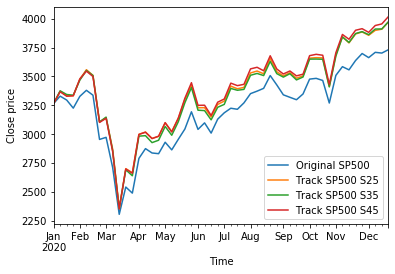

In [30]:
ax = pd.Series(ibb['validate']['lp'].to_numpy(), index=pd.date_range(start='1/1/2020', periods=52, freq='W')).plot(label='Original SP500', legend=True) 
ax.set_xlabel("Time")
ax.set_ylabel("Close price")
for s in [25, 35, 45]:
    ax = pd.Series(ibb_predict['validate'][s], index=pd.date_range(start='1/1/2020', periods = 52,freq='W')).plot(label='Track SP500 S'+str(s), legend=True)
    print("S" +str(s) + " 2-norm difference: ", total_2_norm_diff['validate'][s])  

# BEAT Plot cum return

14.297208
21.068537675492614
21.064759037776923
22.49777297571985


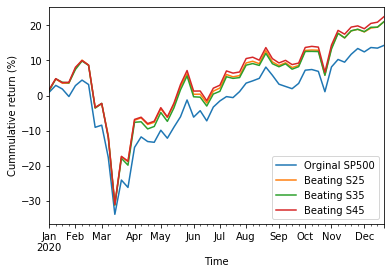

In [31]:
portfolio_num = [45, 55, 65]
index_log_return = np.log(ibb['validate']['percentage']/100+1)
index_cum_return = np.cumsum(index_log_return)*100
print(index_cum_return[-1])
ax = pd.Series(index_cum_return.to_numpy(), index=pd.date_range(start='1/1/2020', periods=52, freq='W')).plot(label='Orginal SP500', legend=True) 
ax.set_xlabel("Time")
ax.set_ylabel("Cummulative return (%)")
beat_portfolio_cum_return = defaultdict(defaultdict)

for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    Z = stock['validate']['percentage'].iloc[:,stock_index].values 
    beat_simple_return = np.dot(Z,  beat_weight_list[weight_index])/100
    beat_log_return = np.log( beat_simple_return +1)
    beat_portfolio_cum_return[s] = np.cumsum(beat_log_return)*100
    print( beat_portfolio_cum_return[s][-1])
    ax = pd.Series(beat_portfolio_cum_return[s], index=pd.date_range(start='1/1/2020', periods = 52,freq='W')).plot(label='Beating S'+str(s), legend=True)



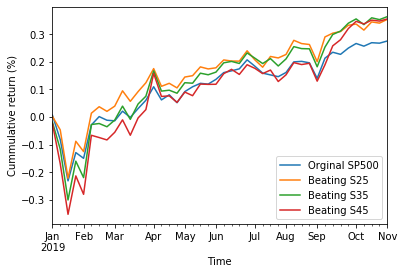

In [163]:
portfolio_num = [45, 55, 65]
index_log_return = np.log(ibb_percentage[426:470]/100+1)
index_cum_return = np.cumsum(index_log_return)*100
ax = pd.Series(index_cum_return.to_numpy(), index=pd.date_range(start='1/1/2019', periods=44, freq='W')).plot(label='Orginal SP500', legend=True) 
ax.set_xlabel("Time")
ax.set_ylabel("Cummulative return (%)")
beat_portfolio_cum_return = defaultdict(defaultdict)
for non_communal in non_communal_list:
    s = 10 + non_communal
    weight_index = non_communal_list.index(non_communal)
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:]))
    Z = stock_percentage.iloc[426:470,stock_index].values 
    beat_simple_return = np.dot(Z,  beat_weight_list[weight_index])/100
    beat_log_return = np.log( beat_simple_return +1)
    beat_portfolio_cum_return[s] = np.cumsum(beat_log_return)*100
    #print( beat_portfolio_cum_return[s] )
    ax = pd.Series(beat_portfolio_cum_return[s], index=pd.date_range(start='1/1/2019', periods = 44,freq='W')).plot(label='Beating S'+str(s), legend=True)

